#### Importing Libraries

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import time
import pickle

from esn_cell import *
# from ddeint import ddeint

import os
os.getcwd()

np.set_printoptions(threshold=sys.maxsize)

#### Defining ESN Parameters

In [2]:
res_units = [50,75,100,125,150]
in_units = 1

activation = np.tanh
leak_rates = [0.2,0.4,0.8,1.0]

sparsity = 0.1

In [7]:
# Input of ESN
esn_input = np.random.uniform(-0.1, 0.1, size=[2000, in_units])

# Order of Perturbation of ESN
perturbation_order = [1e-12, 1e-10, 1e-8]

### Computing the Lyapunov Exponent 

__The dynamic complexity of the network is varied by varying:__

    1. std_dev of the weight initializations: weights_variance
    2. sparsity of the network
    

In [8]:
list_weights_std=[]
r = 10
for power in range(7):
    if power==6:
        r=4
    for i in range(1,r):
        list_weights_std.append(i*(np.power(10,power))*1e-5)
        if power==5:
            list_weights_std.append(i*(np.power(10,power))*1e-5 + 0.5)
            

print(list_weights_std)
len(list_weights_std)

[1e-05, 2e-05, 3.0000000000000004e-05, 4e-05, 5e-05, 6.000000000000001e-05, 7.000000000000001e-05, 8e-05, 9e-05, 0.0001, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007000000000000001, 0.0008, 0.0009000000000000001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.02, 0.030000000000000002, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09000000000000001, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.5, 2.0, 2.5, 3.0000000000000004, 3.5000000000000004, 4.0, 4.5, 5.0, 5.5, 6.000000000000001, 6.500000000000001, 7.000000000000001, 7.500000000000001, 8.0, 8.5, 9.0, 9.5, 10.0, 20.0, 30.000000000000004]


66

In [9]:
dyn_complexity = pd.DataFrame(columns=['Reservoir_Size', 'Perturbation_Order', 'Leak_Rate', 'Weights_SD',\
                                  'Spectral_Radius', 'Lyapunov_Exponent', 'Nof_Samples_(%)'])

n = 1

start = time.time()

for res_size in res_units:    
    
    ESN_arch = [in_units, res_size, 0]
    init_esn = np.zeros([1, res_size])
    
    for p_ord in perturbation_order:
        
        for alpha in leak_rates:
            
            for std in list_weights_std:

                esn = ESN(ESN_arch, activation, alpha, weights_std=std, sparsity=sparsity)

                LE, perc_nof_samples = esn.lyapunov_exponent(inputs=esn_input, init_state=init_esn, \
                                                      perturbation_order=p_ord)

                dyn_complexity.loc[n] = [res_size, p_ord, alpha, std, esn.spectral_radius, LE, perc_nof_samples]

                n+=1

print(time.time()-start)

# TODO: To check if initial values of weights_STD for 'sgmd' (and also for 'tanh')function are using all 
# timesteps and res_neurons, i.e., check if the entries are in total 100000 = res_neurons x timesteps. 
# If the entries for the initial few 'weights_STD' values are empty then that means there are points of time where
# d_1 = 0. Check for a possible reason behind this. RESULT: Using tanh is better than sgmd

# TODO: Plot the lyapunov exponent values for each of the two activation functions separately and 
# perturbation_order wise. In a neat fashion



21893.906163930893


### Querying

##### 1. Querying for the largest value of Lyapunov Exponent

In [10]:
dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity['Lyapunov_Exponent'].max()]

,Reservoir_Size,Perturbation_Order,Leak_Rate,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
3944,150.0,1.000000e-08,1.0,3.0,11.704967,0.640164,100.0


##### 2. Querying for largest value of Lyapunov Exponent for each of the two activation functions

In [15]:
display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Activation=="tanh"')\
                   ['Lyapunov_Exponent'].max()])

dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Activation=="sgmd"')\
                   ['Lyapunov_Exponent'].max()]

,Reservoir_Size,Perturbation_Order,Activation,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
1898,150,1.000000e-08,tanh,3.0,12.165158,0.641684,15000.0


,Reservoir_Size,Perturbation_Order,Activation,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
1835,150,1.000000e-10,sgmd,4.5,18.497893,0.637795,15000.0


##### 3. For __tanh__ activation, query for the largest values of Lyapunov Exponent for _each value of perturbation order._

In [12]:
display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Perturbation_Order==1e-12')\
                   ['Lyapunov_Exponent'].max()])

display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Perturbation_Order==1e-10')\
                   ['Lyapunov_Exponent'].max()])

display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Perturbation_Order==1e-8')\
                   ['Lyapunov_Exponent'].max()])


,Reservoir_Size,Perturbation_Order,Leak_Rate,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
3415,150.0,1.000000e-12,1.0,2.5,10.829715,0.625848,100.0


,Reservoir_Size,Perturbation_Order,Leak_Rate,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
3680,150.0,1.000000e-10,1.0,3.0,11.936808,0.628295,100.0


,Reservoir_Size,Perturbation_Order,Leak_Rate,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
3944,150.0,1.000000e-08,1.0,3.0,11.704967,0.640164,100.0


##### 3. For tanh activation, query for the largest values of Lyapunov Exponent for each Reservoir Size and for perturbation order of 1e-12.

In [85]:
display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Perturbation_Order==1e-12 & Leak_Rate==0.2')\
                   ['Lyapunov_Exponent'].max()])

display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Perturbation_Order==1e-12 & Leak_Rate==0.4')\
                   ['Lyapunov_Exponent'].max()])

display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Perturbation_Order==1e-12 & Leak_Rate==0.8')\
                   ['Lyapunov_Exponent'].max()])

display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Perturbation_Order==1e-12 & Leak_Rate==1.0')\
                   ['Lyapunov_Exponent'].max()])

# display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Perturbation_Order==1e-12 & Reservoir_Size==150')\
#                    ['Lyapunov_Exponent'].max()])


,Reservoir_Size,Perturbation_Order,Leak_Rate,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
2440,125.0,1.000000e-12,0.2,10.0,35.04355,0.150723,100.0


,Reservoir_Size,Perturbation_Order,Leak_Rate,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
3294,150.0,1.000000e-12,0.4,8.0,34.595376,0.330157,100.0


,Reservoir_Size,Perturbation_Order,Leak_Rate,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
3352,150.0,1.000000e-12,0.8,4.0,16.231162,0.56376,100.0


,Reservoir_Size,Perturbation_Order,Leak_Rate,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
3415,150.0,1.000000e-12,1.0,2.5,10.829715,0.625848,100.0


##### 4. For tanh activation, query for the largest values of Lyapunov Exponent for each Reservoir Size and for perturbation order of 1e-10.

In [11]:
display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Activation=="tanh" & Perturbation_Order==1e-10 & Reservoir_Size==50')\
                   ['Lyapunov_Exponent'].max()])

display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Activation=="tanh" & Perturbation_Order==1e-10 & Reservoir_Size==75')\
                   ['Lyapunov_Exponent'].max()])

display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Activation=="tanh" & Perturbation_Order==1e-10 & Reservoir_Size==100')\
                   ['Lyapunov_Exponent'].max()])

display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Activation=="tanh" & Perturbation_Order==1e-10 & Reservoir_Size==125')\
                   ['Lyapunov_Exponent'].max()])

display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Activation=="tanh" & Perturbation_Order==1e-10 & Reservoir_Size==150')\
                   ['Lyapunov_Exponent'].max()])

,Reservoir_Size,Perturbation_Order,Activation,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
179,50,1.000000e-10,tanh,1.5,3.114186,0.175781,4900.0


,Reservoir_Size,Perturbation_Order,Activation,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
577,75,1.000000e-10,tanh,2.5,7.48769,0.300654,7500.0


,Reservoir_Size,Perturbation_Order,Activation,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
972,100,1.000000e-10,tanh,2.0,6.710084,0.421748,10000.0


,Reservoir_Size,Perturbation_Order,Activation,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
1369,125,1.000000e-10,tanh,2.5,9.009181,0.517918,12500.0


,Reservoir_Size,Perturbation_Order,Activation,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
1765,150,1.000000e-10,tanh,2.5,10.025548,0.619211,15000.0


##### 5. For tanh activation, query for the largest values of Lyapunov Exponent for each Reservoir Size and for perturbation order of 1e-8.

In [12]:
display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Activation=="tanh" & Perturbation_Order==1e-8 & Reservoir_Size==50')\
                   ['Lyapunov_Exponent'].max()])

display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Activation=="tanh" & Perturbation_Order==1e-8 & Reservoir_Size==75')\
                   ['Lyapunov_Exponent'].max()])

display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Activation=="tanh" & Perturbation_Order==1e-8 & Reservoir_Size==100')\
                   ['Lyapunov_Exponent'].max()])

display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Activation=="tanh" & Perturbation_Order==1e-8 & Reservoir_Size==125')\
                   ['Lyapunov_Exponent'].max()])

display(dyn_complexity.loc[dyn_complexity['Lyapunov_Exponent']==dyn_complexity.query('Activation=="tanh" & Perturbation_Order==1e-8 & Reservoir_Size==150')\
                   ['Lyapunov_Exponent'].max()])

,Reservoir_Size,Perturbation_Order,Activation,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
312,50,1.000000e-08,tanh,2.0,5.165181,0.134182,5000.0


,Reservoir_Size,Perturbation_Order,Activation,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
709,75,1.000000e-08,tanh,2.5,7.336074,0.322631,7500.0


,Reservoir_Size,Perturbation_Order,Activation,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
1104,100,1.000000e-08,tanh,2.0,6.525013,0.42747,10000.0


,Reservoir_Size,Perturbation_Order,Activation,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
1501,125,1.000000e-08,tanh,2.5,9.393865,0.571412,12500.0


,Reservoir_Size,Perturbation_Order,Activation,Weights_SD,Spectral_Radius,Lyapunov_Exponent,Nof_Samples_(%)
1898,150,1.000000e-08,tanh,3.0,12.165158,0.641684,15000.0


<IPython.core.display.Javascript object>


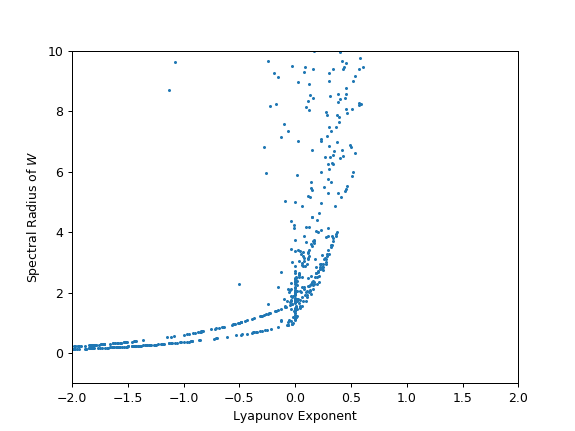

In [42]:
# Plot for Spectral Radius vs LE

%matplotlib notebook

plt.scatter(dyn_complexity[['Lyapunov_Exponent']].values, dyn_complexity[['Spectral_Radius']].values, s=2)
plt.xlabel('Lyapunov Exponent')
plt.ylabel('Spectral Radius of $\mathbf{\mathit{W}}$')
plt.xlim(-2, 2)
plt.ylim(-1, 10)
plt.show()


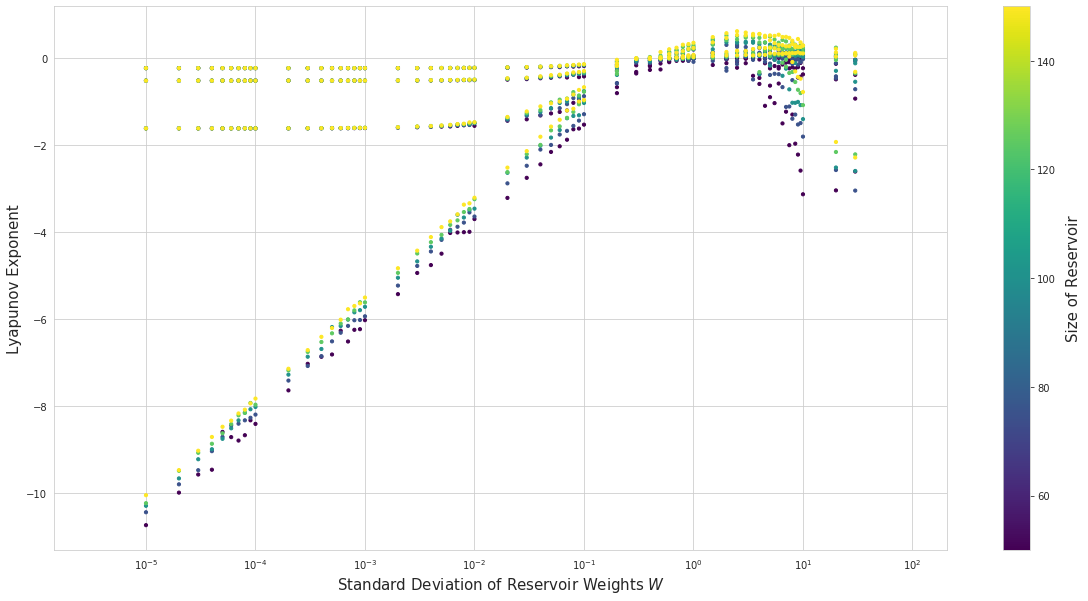

In [294]:
# Plot for LE vs STD

filtered = dyn_complexity.query('Perturbation_Order == 1e-12')

f, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('Standard Deviation of Reservoir Weights $\mathbf{\mathit{W}}$', fontsize=15)
ax.set_ylabel('Lyapunov Exponent', fontsize=15)
ax.set(xscale="log")
ax = plt.scatter(filtered['Weights_SD'], filtered['Lyapunov_Exponent'], s=10, c=filtered['Reservoir_Size'], \
                 cmap='viridis', vmin=50, vmax=150)
plt.colorbar().set_label("Size of Reservoir", fontsize=15, labelpad=10)

# plt.savefig('stdVSle.pdf')

# %matplotlib notebook

# plt.scatter(dyn_complexity[['Lyapunov_Exponent']].values, dyn_complexity[['Spectral_Radius']].values, s=2)
# plt.xlabel('Lyapunov Exponent')
# plt.ylabel('Spectral Radius of $\mathbf{\mathit{W}}$')
# plt.xlim(-2, 2)
# plt.ylim(-1, 10)
# plt.show()

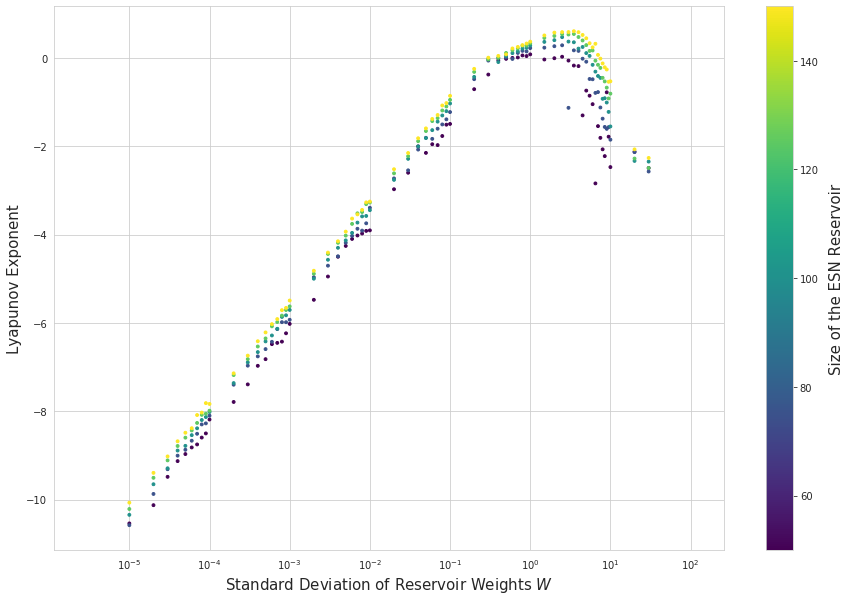

In [236]:
with open('DF_ResSize_Pert_Activ_STD_SpecR_LE_2.pickle', 'rb') as f:
    d = pickle.load(f)

filtered = d.query('Perturbation_Order == 1e-12 & Activation == "tanh"')
# display(filtered)
f, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel('Standard Deviation of Reservoir Weights $\mathbf{\mathit{W}}$', fontsize=15)
ax.set_ylabel('Lyapunov Exponent', fontsize=15)
ax.set(xscale="log")
ax = plt.scatter(filtered['Weights_SD'], filtered['Lyapunov_Exponent'], s=8, c=filtered['Reservoir_Size'], cmap='viridis', vmin=50, vmax=150)
plt.colorbar().set_label("Size of the ESN Reservoir", fontsize=15, labelpad=10)

# plt.savefig('stdVSle.pdf')


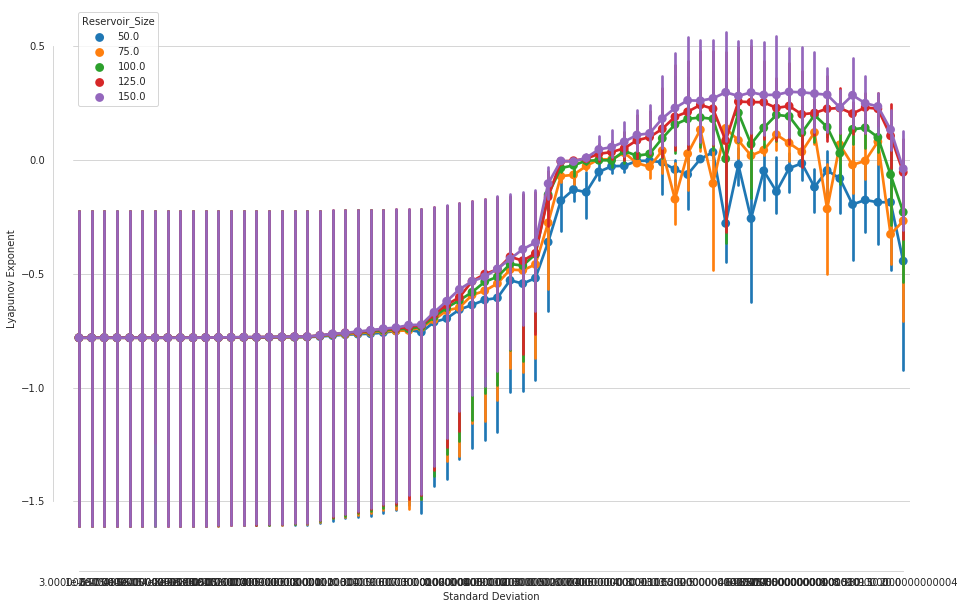

In [128]:
filtered = dyn_complexity.query('Perturbation_Order == 1e-12 & Leak_Rate != 1.0')

# display(filtered)
plt.figure(figsize=(15,10))

sns.set_style("whitegrid")
ax = sns.pointplot(x='Weights_SD', y='Lyapunov_Exponent', data=filtered, hue='Reservoir_Size')
ax.set(xlabel='Standard Deviation', ylabel='Lyapunov Exponent')
#ax.xticks([1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
sns.despine(offset=20, trim=True)

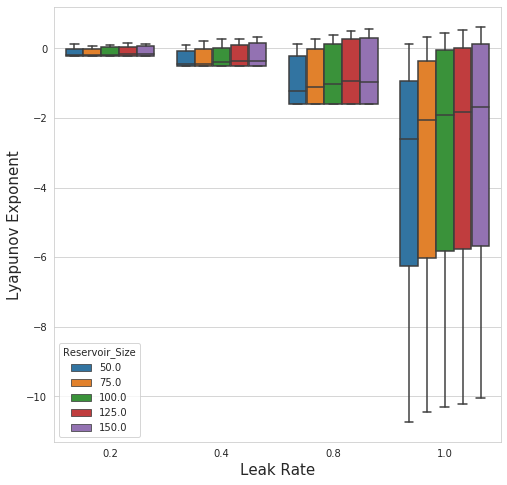

In [168]:

filtered = dyn_complexity.query('Perturbation_Order == 1e-12')

plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
ax = sns.boxplot(x='Leak_Rate', y='Lyapunov_Exponent', data=filtered, hue='Reservoir_Size')
ax.set_xlabel('Leak Rate', fontsize=15)
ax.set_ylabel('Lyapunov Exponent', fontsize=15)
plt.savefig('LeakrateVSle.pdf')
# ax.set(xlabel='Leak Rate of Reservoir', ylabel='Lyapunov Exponent')
# sns.despine(offset=10, trim=True)
# sns.pointplot(x='Reservoir_Size', y='Lyapunov_Exponent', data=dyn_complexity, hue='Leak_Rate')
#sns.xlim(0, 10)

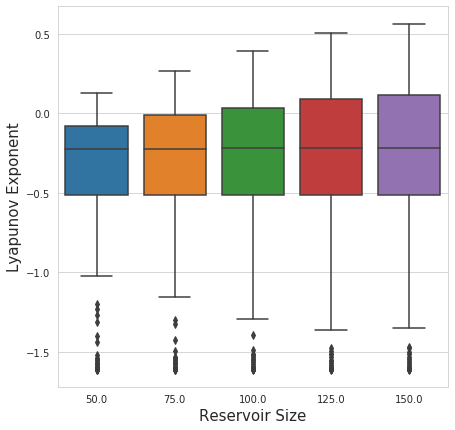

In [160]:
filtered = dyn_complexity.query('Perturbation_Order == 1e-12 & Leak_Rate!=1.0')
plt.figure(figsize=(7,7))
sns.set_style("whitegrid")
# ax = sns.boxplot(x='Reservoir_Size', y='Lyapunov_Exponent', data=filtered)
ax = sns.boxplot(x='Reservoir_Size', y='Lyapunov_Exponent', data=filtered)
ax.set_xlabel('Reservoir Size', fontsize=15)
ax.set_ylabel('Lyapunov Exponent', fontsize=15)
# sns.despine(offset=0, trim=True)
plt.savefig('ResSizeVSle.pdf')


In [25]:
filtered = (dyn_complexity.query('Nof_Samples_(%) != 0 & Activation == "tanh" & Weights_SD >= 10.0')
                     .filter(['Reservoir_Size', 'Perturbation_Order', 'Activation', 'Weights_SD', 'Nof_Samples_(%)']))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(filtered)

SyntaxError: Python keyword not valid identifier in numexpr query (<unknown>, line 1)

In [81]:
#print(sys.getsizeof(dyn_cmplx))
print(sys.getsizeof(dyn_complexity))

417312


In [27]:
np.argwhere(np.isnan(dyn_cmplx_var.loc[67]['Ratio_ln(d1/d0)']))

array([], shape=(0, 1), dtype=int64)

In [13]:
# for writing

with open('DF_ResSize_Pert_Leak_STD_SpecR_LE_1.pickle', 'wb') as f:
    pickle.dump(dyn_complexity, f)

In [ ]:
# for reading
with open('dyn_cmplx_var_2.pickle', 'rb') as f:
    d = pickle.load(f)

# Transfer Entropy

In [2]:
res_units = [100]
in_units = 1

activation = np.tanh
leak_rates = [0.4]
sparsity = [0.10]

# Input of ESN
esn_input = np.random.uniform(0, 0.5, size=[2000, in_units])

# Order of Perturbation of ESN
perturbation_order = 1e-12

# logs_beforeEOC = np.linspace(-3.5,-1.4,20)
# logs_atEOC = np.linspace(-1.3,0,100)
# logs_afterEOC = np.linspace(0.01,1.6,30)

# list_weights_sd = np.exp(np.concatenate((logs_beforeEOC,logs_atEOC,logs_afterEOC)))

logs = np.linspace(-1.6,0.8,120)
list_weights_sd = np.exp(logs)

len(list_weights_sd)
# print(list_weights_std, '\n', logs_list)

120

In [ ]:
TE = pd.DataFrame(columns=['Reservoir_Size', 'Leak_Rate', 'Weights_SD', \
                           'Lyapunov_Exponent', 'Nof_Samples_(%)', 'TE', 'Nonzero_Connections'])

te_results = {}

n = 1

start = time.time()
    
for res_size in res_units:    
    
    ESN_arch = [in_units, res_size, 0]
    init_esn = np.zeros([1, res_size])
    
    for alpha in leak_rates:

        for sd in list_weights_sd:

            s = time.time()
            
            esn = ESN(ESN_arch, activation, alpha, weights_std=sd)

            reservoir_states = esn.res_states(inputs=esn_input, init_state=init_esn)[0]
            
            LE, perc_nof_samples = esn.lyapunov_exponent(res_states=reservoir_states)
            
            _, te, nonzero = esn.transfer_entropy(res_states=reservoir_states)

            TE.loc[n] = [res_size, alpha, std, LE, perc_nof_samples, te, nonzero]
            
            print('\n \033[1m Computation for n = ',n ,' completed in: ', (time.time()-s),' \033[0m')
            
#             te_results[n] = results

            n+=1

print(time.time()-start)

/home/tah/anaconda3/envs/neuroevo/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tah/anaconda3/envs/neuroevo/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Adding data with properties: 100 processes, 1001 samples, 1 replications
overwriting existing data

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) fi


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

  Computation for n =  3  completed in:  12134.598342180252  
Adding data with properties: 100 processes, 1001 samples, 1 replications
overwriti


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

  Computation for n =  8  completed in:  15502.969863891602  
Adding data with properties: 100 processes, 1001 samples, 1 replications
overwriting existing data

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) 


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

-----------------------

# Rough

Adding data with properties: 3 processes, 2000 samples, 1 replications
overwriting existing data

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates

---------------------------- (3) prune source candidate

---------------------------- (4) final statistics
No links in final results ...
No significant links found in the network.


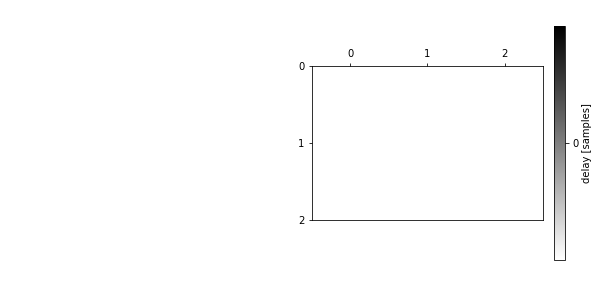

142.61608719825745


In [102]:
from idtxl.data import Data
from idtxl.multivariate_te import MultivariateTE
from idtxl.visualise_graph import plot_network
import matplotlib.pyplot as plt
import pandas as pd
import time

n1 = ress[:,0]
n2 = ress[:,1]
n3 = ress[:,2]


df = pd.DataFrame(
    {'col1': n1, 'col2': n2, 'col3': n3})

d = Data(df, dim_order='sp')


settings = {'cmi_estimator': 'JidtKraskovCMI',
            'max_lag_sources': 4,
            'min_lag_sources': 1,
            'verbose':False}

start = time.time()
# c) Run analysis
results = MultivariateTE().analyse_network(settings=settings, data=d, targets=[0,2], sources=[[1],[0]])

# d) Plot inferred network to console and via matplotlib
results.print_edge_list(weights='max_te_lag', fdr=False)
plot_network(results=results, weights='max_te_lag', fdr=False)
plt.show()

print(time.time() - start)

In [105]:
results.get_single_target(2, fdr=False)

{'sources_tested': [0],
 'current_value': (2, 4),
 'selected_vars_target': [(2, 1)],
 'selected_vars_sources': [],
 'selected_sources_pval': None,
 'selected_sources_te': None,
 'omnibus_te': None,
 'omnibus_pval': None,
 'omnibus_sign': False,
 'te': None}

In [98]:
# Input of ESN
esn_input = np.random.uniform(-0.1, 0.1, size=[2000, in_units])
# Initial State of ESN
init_esn = np.zeros([1, 100])

ESN_arch = [1, 100, 0]

d_0 = 1e-10
std = 1e-5

esn = ESN(ESN_arch, activation, leak_rate=0.4, weights_std=0.1, sparsity=0.1)
ress = esn.res_states(inputs=esn_input, init_state=init_esn)[0]

ress.shape
# Instantiating a copy ESN
# copy_esn = ESN(ESN_arch, activation, leak_rate=alpha, weights_std=std, sparsity=sparseness)
# copy_esn.weights_in = esn.weights_in
# copy_esn.weights_res = esn.weights_res
# copy_esn.bias = esn.bias

(2000, 100)

In [90]:
t=1000

init_copy_esn = copy.deepcopy(ress[t].reshape([1, res_units]))
np.put(init_copy_esn, ind=0, v=d_0+init_copy_esn[0][0]) #perturbing 0th neuron
input_copy_esn = esn_input[t+1]

# Check separation between the two networks after 1 timestep
res_copy_esn = copy_esn.res_states(inputs=input_copy_esn, init_state=init_copy_esn)[0]

#print('\n ESN WEIGHTS: \n', esn.weights_res[0])

#print('\n Input WEIGHTS: \n', esn.weights_in)

#print('\n ESN Reservoir STATE: \n', ress[t+1].reshape([1,res_units]))
#print('\n Copy ESN INIT STATE: \n', init_copy_esn)
#print(res_copy_esn)
print(res_copy_esn == ress[t+1].reshape([1,res_units]))
d_1 = np.linalg.norm(res_copy_esn-ress[t+1])
print(d_1)


[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True False
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True]]
7.105427357601002e-15


In [103]:
t = t+12
init_copy_esn = ress[t+1] + np.multiply((d_0/d_1),np.subtract(res_copy_esn, ress[t+1]))
#print(init_copy_esn)

input_copy_esn = esn_input[t+2]

# Check separation between the two networks after 1 timestep
res_copy_esn = copy_esn.res_states(inputs=input_copy_esn, init_state=init_copy_esn)[0]


print(res_copy_esn == ress[t+2].reshape([1,res_units]))
print(np.linalg.norm(res_copy_esn-ress[t+2]))

#np.log(np.linalg.norm(res_copy_esn-ress[t+2])/d_0)

[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False]]
4.35336846692496e-07


In [17]:
l = 40
k = 0.06

print((np.multiply(esn_input[0],esn.weights_in) + np.matmul(init_esn,esn.weights_res) + esn.bias)[0][0])
print(l/(1+np.exp(-k*(np.multiply(esn_input[0],esn.weights_in) + np.matmul(init_esn,esn.weights_res) + esn.bias)[0][0])) - l/2)
print(l/(1+np.exp(np.multiply(-k,np.multiply(esn_input[0],esn.weights_in) + np.matmul(init_esn,esn.weights_res) + esn.bias))))

#print(l/(1+np.exp(-k*ress[0][0])))
#print(my_sigmoid(esn_input[1]*esn.weights_in + np.matmul(ress[0].reshape([1,res_units]),esn.weights_res) + esn.bias ))

3.193178429320865e-07
1.9159070419050295e-07
[[20.00000019 20.00000024 20.00000016 19.99999965 19.99999966 20.00000007
  20.00000008 19.9999999  19.99999991 19.9999996  19.99999983 20.00000043
  19.99999979 20.00000015 20.00000067 20.00000014 20.         20.00000043
  19.99999988 20.00000067 19.99999968 20.00000025 19.99999988 20.0000002
  20.00000029 19.99999997 19.99999967 19.99999999 20.00000029 20.00000008
  19.99999955 20.0000001  19.99999989 19.99999986 19.99999981 19.99999975
  20.00000008 19.9999999  19.9999996  20.00000014 20.00000012 19.99999983
  20.00000003 19.99999997 19.99999985 19.99999936 20.00000021 20.00000035
  20.00000003 20.00000026 19.99999981 20.00000005 20.00000007 20.00000005
  19.99999987 19.99999995 19.99999998 20.00000063 19.99999997 20.0000001
  19.99999949 20.00000015 19.99999972 20.00000013 20.00000015 20.00000058
  20.00000014 19.99999994 19.99999969 20.00000019 20.00000027 19.99999961
  20.00000002 19.99999998 19.9999999  19.99999965 20.00000019 19.9999

In [113]:
s = 0
count = 0
for i in range(len(dyn_cmplx_var.loc[50]['Ratio_ln(d1/d0)'])):
    if (np.isnan(dyn_cmplx_var.loc[50]['Ratio_ln(d1/d0)'][i]) == False and \
        dyn_cmplx_var.loc[50]['Ratio_ln(d1/d0)'][i] != -inf):
        s = s + dyn_cmplx_var.loc[50]['Ratio_ln(d1/d0)'][i]
        count+=1

print(s/count)

0.3386393012821415


In [4]:
list_weights_std=[]
r = 10
for power in range(7):
    if power==7:
        r = 5
    for i in range(1,r):
        list_weights_std.append(i*(np.power(10,power))*1e-5)

wres_specradius = pd.DataFrame(columns=['Weights_STD','SpecRadius_Before_Normal', 'SpecRadius_After_Normal'])
n = 1

for std in list_weights_std:
    
    esn = ESN(ESN_arch, activation, alpha, std, sparseness)
    wres_specradius.loc[n] = [std, esn.spectral_radius, esn.normalized_spectral_radius]
    n+=1

avg_before = wres_specradius['SpecRadius_Before_Normal'].mean()
avg_after = wres_specradius['SpecRadius_After_Normal'].mean()

#print(avg_before)
#print(avg_after)
print(wres_specradius.loc[45])

wres_specradius

NameError: name 'ESN_arch' is not defined

In [3]:
list_weights_std=[]
r = 10
for power in range(7):
    if power==6:
        r=10
    for i in range(1,r):
        list_weights_std.append(i*(np.power(10,power))*1e-5)
        if power==5:
            list_weights_std.append(i*(np.power(10,power))*1e-5 + 0.5)
            
    
print(list_weights_std)

n=1
spec_rad = pd.DataFrame(columns=['Weights_SD', 'Spectral_Radius'])

for res_size in res_units:
    ESN_arch = [in_units, res_size, 0]
    for std in list_weights_std:
        esn = ESN(ESN_arch, activation[0], leak_rate=1.0, weights_std=std, sparsity=0.1)
        spec_rad.loc[n] = [ std, esn.spectral_radius]
        n+=1



%matplotlib notebook

plt.scatter(spec_rad[['Weights_SD']].values, spec_rad[['Spectral_Radius']].values, s=2)
plt.xlabel('Standard Deviation of $\mathbf{\mathit{W}}$')
plt.ylabel('Spectral Radius of $\mathbf{\mathit{W}}$')
# plt.xlim(-2, 2)
# plt.ylim(-1, 10)
plt.show()
plt.savefig('SpecRadius_vs_SD.pdf')    


[1e-05, 2e-05, 3.0000000000000004e-05, 4e-05, 5e-05, 6.000000000000001e-05, 7.000000000000001e-05, 8e-05, 9e-05, 0.0001, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007000000000000001, 0.0008, 0.0009000000000000001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.02, 0.030000000000000002, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09000000000000001, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.5, 2.0, 2.5, 3.0000000000000004, 3.5000000000000004, 4.0, 4.5, 5.0, 5.5, 6.000000000000001, 6.500000000000001, 7.000000000000001, 7.500000000000001, 8.0, 8.5, 9.0, 9.5, 10.0, 20.0, 30.000000000000004, 40.0, 50.00000000000001, 60.00000000000001, 70.0, 80.0, 90.00000000000001]


NameError: name 'res_units' is not defined

In [198]:
dyn_cmplx = dyn_cmplx_copy
print(len(dyn_cmplx_copy))
dyn_cmplx.head()

1980


,Reservoir_Size,Perturbation_Order,new-col,Activation,Weights_STD,Spectral_Radius,Lyapunov_Expo,Ratio_ln(d1/d0),Len_Diff,ActivationF
1,50,1.000000e-12,tanh,<ufunc 'tanh'>,0.00001,0.000025,-10.588445,"[-10.337778615069501, -10.335866785625205, -10...",0.00,tanh
2,50,1.000000e-12,tanh,<ufunc 'tanh'>,0.00002,0.000040,-10.117200,"[-10.21260947550548, -10.3992224199343, -9.868...",0.02,tanh
3,50,1.000000e-12,tanh,<ufunc 'tanh'>,0.00003,0.000069,-9.589762,"[-9.293282647734559, -9.668847746647819, -9.94...",0.02,tanh
4,50,1.000000e-12,tanh,<ufunc 'tanh'>,0.00004,0.000099,-9.220252,"[-9.313768411202002, -9.199545000549268, -9.56...",0.00,tanh
5,50,1.000000e-12,tanh,<ufunc 'tanh'>,0.00005,0.000101,-9.204796,"[-9.56702803251099, -9.465540922952894, -8.980...",0.00,tanh


### Simulating the Mackey-Glass Equation
##### for n = 10

In [ ]:
model = lambda X,t,beta,n,tau,gamma : beta*((X(t-tau))/(1 + X(t-tau)**n)) - gamma*X(t)

X_0 = lambda t:0.5 # history before t=0

X_ts = {}

bifurcation_para = [10]

for i, n in enumerate(bifurcation_para):
    t = np.linspace(0,30,3000)
    X_t = ddeint(model, X_0, t, fargs=(2, n, 2, 1)) #beta=2, n=n, tau=2, gamma=1
    X_ts[n] = X_t 
    
#length of input series
len_in = len(X_ts[10])  
   
esn_input = X_ts[10].reshape([in_units, len_in]) # of shape: [in_units, len_in]

#print(esn_input[0][1].shape)
#print(esn_input.shape)

print(esn_input[:,3].reshape([1,1]))

In [ ]:
ax_sparsity=[]
ax_std=[]

for i in range(50):
    for e in list_sparsity:
        ax_sparsity.append(e)

for e in list_weights_std:
    for i in range(50):
        ax_std.append(e)
        
#print(ax_std,'\n', ax_sparsity)
#print(type(dyn_cmplx_var['Lyapunov_Expo'].tolist()))
#print(type(ax_std))

In [ ]:
%matplotlib notebook

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ax_std, ax_sparsity, dyn_cmplx_var['Lyapunov_Expo'].tolist())
ax.set_xlabel('Weights_STD in (0.05-0.7)')
ax.set_ylabel('Sparsity in (0.05-0.5)')
ax.set_zlabel('Lyapunov Exponent')

plt.show()

In [ ]:
dyn_cmplx_var.groupby('Sparsity', as_index=False)['Lyapunov_Expo'].mean()

In [ ]:
dyn_cmplx_var.groupby('Weights_STD', as_index=False)['Lyapunov_Expo'].mean()

In [ ]:
import numpy as np

class Taher():
    
    def __init__(self, rand=500):
        np.random.seed(123)
        self.rand = rand
        self.rand = rand*2
        self.var1 = np.random.uniform(0, 1, (1,2))
        self.var2 = np.random.normal(0, 0.001, [3,3])
        self.spec = np.abs(np.linalg.eigvals(self.var2)).max()
        
    def floop(self):
        print('This is floop:', self.spec)
        return self.var2
        
    def bloop(self):
        r = Taher()
        print('r.rand before: ', r.rand)
        r.rand = self.rand + 1
        #v2 = r.floop()
        #print('v2:', v2)
        print('This is r.rand: ', r.rand)
        print('This is t.rand: ', self.rand)
        
        
t = Taher(700)
t.bloop()

In [ ]:
input_var = 1e-12
weights_std = 1e-1
sparsity = 0.1
alpha = 1.0

init_esn = np.zeros([1, res_units], dtype="float64")
esn_input = np.random.normal(size=[2000, in_units], scale=input_var)

strt = time.time()
esn = ESN(ESN_arch, activation, alpha, weights_std, sparsity)

lyp_exp = esn.lyapunov_exponent(inputs=esn_input, init_state=init_esn)

print('Lyapunov Exponent of esn: ', lyp_exp)
print(time.time()-strt)
#avgdist_perneuron

In [2]:
def sgmd(x):
    k = np.multiply(-0.06, x)
    
    return (40/(1+np.exp(k)) - 20)